In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import torch

In [2]:
from diffusers import StableDiffusionAttendAndExcitePipeline

In [3]:
pipe = StableDiffusionAttendAndExcitePipeline.from_pretrained(
    "/fs/scratch/rng_cr_bcai_dl/lyu7rng/0_project_large_models/pretrained/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda")


prompt = "a cat and a frog"

# use get_indices function to find out indices of the tokens you want to alter
pipe.get_indices(prompt)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/fs/scratch/rng_cr_bcai_dl/lyu7rng/conda_envs/latest_diffusers/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


{0: '<|startoftext|>',
 1: 'a</w>',
 2: 'cat</w>',
 3: 'and</w>',
 4: 'a</w>',
 5: 'frog</w>',
 6: '<|endoftext|>'}

In [4]:
token_indices = [2, 5]
seed = 6141
generator = torch.Generator("cuda").manual_seed(seed)

images = pipe(
    prompt=prompt,
    token_indices=token_indices,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
#image.save(f"../images/{prompt}_{seed}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

/fs/scratch/rng_cr_bcai_dl/lyu7rng/conda_envs/latest_diffusers/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343967769/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


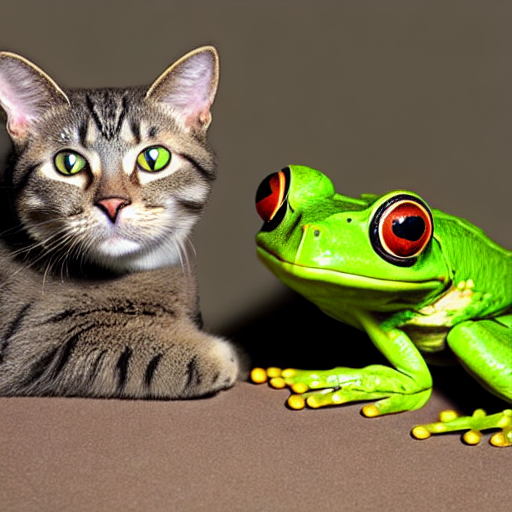

In [5]:
display(image)

# Divide and Bind

In [3]:
from divide_and_bind.pipeline_divide_and_bind_latest import StableDiffusionDivideAndBindPipeline

In [ ]:
pipe = StableDiffusionDivideAndBindPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float32
).to("cuda")

In [ ]:
prompt = "a purple dog and a green bench on the street,snowy driving scene"

# use get_indices function to find out indices of the tokens you want to alter
pipe.get_indices(prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

/fs/scratch/rng_cr_bcai_dl/lyu7rng/conda_envs/latest_diffusers/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343967769/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/fs/scratch/rng_cr_bcai_dl/lyu7rng/conda_envs/latest_diffusers/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([15, 16])) that is different to the input size (torch.Size([1, 16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


	 Finished with loss of: -0.07646983861923218
	 Finished with loss of: -0.18347160518169403
	 Exceeded max number of iterations (50)! Finished with a max attention of 0.754328191280365
	 Finished with loss of: -0.1790468543767929


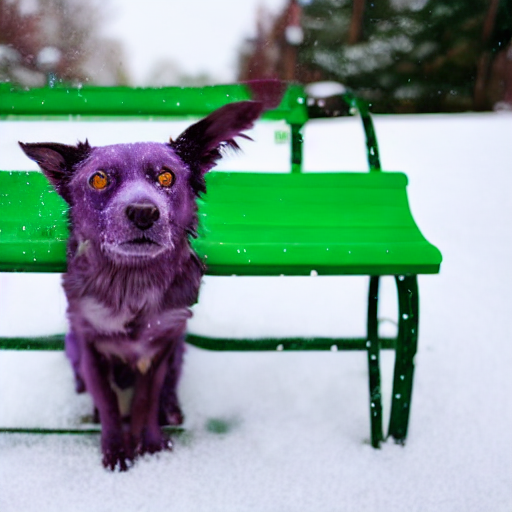

In [8]:
token_indices = [3,7]
color_indices = [2,6]
loss_mode = 'tv_bind'
seed = 2702
generator = torch.Generator("cuda").manual_seed(seed)

images = pipe(
    prompt=prompt,
    token_indices=token_indices,
    color_indices=color_indices,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
    loss_mode=loss_mode
).images

image = images[0]
display(image)
#image.save(f"../images/{prompt}_{seed}.png")

In [ ]:
# output_dir = './test_outputs'
# os.makedirs(output_dir, exist_ok=True)

## Examples Generation

In [58]:
examples = [
    {
        'example_id': 0,
        'prompt': 'The ironman cooking in kitchen with a dog, Style-Empire,high quality, 8k UHD', 
        'loss_mode': 'tv_bind', 'indices':[2,8], 'color_indices':None, 'seed': [2512, 7559, 4749], 
    },
    {
        'example_id': 1,
        'prompt': 'three geese floating in the middle of a river', 
        'loss_mode': 'tv_bind', 'indices':[2], 'color_indices':None, 'seed': [857, 6818, 9253], 
    },
    {
        'example_id': 2,
        'prompt': 'A train driving down the tracks under a bridge.', 
        'loss_mode': 'tv_bind', 'indices':[2,6,9], 'color_indices':None, 'seed': [6071, 1937, 5835], 
    },
    {
        'example_id': 3,
        'prompt': 'a dog and a turtle on the street,snowy driving scene', 
        'loss_mode': 'tv_bind', 'indices':[2,5], 'color_indices':None, 'seed': [8099, 1905, 8448], 
    },
    {
        'example_id': 4,
        'prompt': 'a purple dog and a green bench on the street,snowy driving scene', 
        'loss_mode': 'tv_bind', 'indices':[3,7], 'color_indices':[2,6], 'seed': [2702, 4749, 3673], 
    },
    {
        'example_id': 5,
        'prompt': 'a black cat and a red suitcase in the library', 
        'loss_mode': 'tv_bind', 'indices':[3,7], 'color_indices':[2,6], 'seed':[8289,1676,1225],  
    },
    {
        'example_id': 6,
        'prompt': 'The flash and the superman on the snowy street, unreal engine 5, 8k, ultra hd', 
        'loss_mode': 'tv_bind', 'indices':[2,5], 'color_indices':None, 'seed': [4432,6929,5469], 
    },
    {
        'example_id': 7,
        'prompt': 'The flash with green suit and the batman with blue suit, 8k, ultra hd', 
        'loss_mode': 'tv_bind', 'indices':[2,8], 'color_indices':[4,10], 'seed': [2317, 8880, 6859],  
    },
]

In [ ]:
example_id = 4

# Read 
example_dict = examples[example_id]
prompt = example_dict['prompt']
token_indices = example_dict['indices']#[2,5] # 
color_indices = example_dict['color_indices'] # None if there are no attributes
seeds = example_dict['seed']
loss_mode = example_dict['loss_mode']

#loss_mode = 'tv'
print(loss_mode)


token_indices = [3,7]
color_indices = [2,6]

for seed in seeds[0:1]:
    generator = torch.Generator("cuda").manual_seed(seed)
    images = pipe(
        prompt=prompt,
        token_indices=token_indices,
        color_indices=color_indices,
        guidance_scale=7.5,
        generator=generator,
        num_inference_steps=50,
        max_iter_to_alter=25,
        loss_mode=loss_mode
    ).images

    image = images[0]
    display(image)